# Keyboard Heatmap With New Layout:

Name: Deepak Charan S

Roll No: EE23B022

Date: 28.09.24

Description: To analyze keyboard usage patterns for a given keyboard layout and text input by generating a heatmap visualization of key usage. To also calculate the total distance traveled by fingers while typing. (This notebook works with the new layout provided (as per the one given in programming quiz 4 question 3)



In [2]:
import qwerty_layout as qwerty  # Importing the layout

from collections import defaultdict
import math

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.patches import Rectangle

import numpy as np

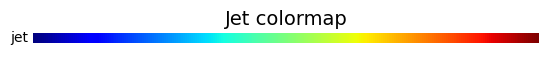

In [4]:
import pylab

cm = pylab.get_cmap("jet")  # The colormap I have used for this assignment

cmaps = {}
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))


def plot_color_gradient(category, cmap_list):
    figh = 0.35 + 0.15 + 0.22
    fig, axs = plt.subplots(nrows=2, figsize=(6.4, figh))
    fig.subplots_adjust(top=1 - 0.35 / figh, bottom=0.15 / figh, left=0.2, right=0.99)
    axs[0].set_title(f"{category} colormap", fontsize=14)

    for ax, name in zip(axs, cmap_list):
        ax.imshow(gradient, aspect="auto", cmap=mpl.colormaps[name])
        ax.text(
            -0.01,
            0.5,
            name,
            va="center",
            ha="right",
            fontsize=10,
            transform=ax.transAxes,
        )

    for ax in axs:
        ax.set_axis_off()


plot_color_gradient(
    "Jet",
    [
        "jet",
    ],
)

In [9]:
class kdb_analysis:  # Used a class for all the operations
    def __init__(self, layout=qwerty):
        self.layout = layout  # Uses the layout provided by user

        self.travel = (
            self.key_dist()
        )  # Dictionary which stores the distance travelled by fingers to type each key
        self.freq = defaultdict(
            int
        )  # Dictionary which stores the stores the frequencies of each key pressed
        self.let_rank = (
            []
        )  # List which ranks the usage of each letter and is used while assinging colour
        self.fig = None
        self.ax = None

    def visualise_kyb(self):  # Method to visualise the keyboard
        self.fig, self.ax = plt.subplots(figsize=(13, 4))

        self.ax.set_xticks([])  # Removing axis points (1,2,3.. on x axis wont show up)
        self.ax.set_yticks([])

        self.ax.set_xlim(-1, 15)
        self.ax.set_ylim(-1, 5)
        plt.tight_layout()

        for key in layout.keys:
            if self.freq[key] == 0:  # The key has never been pressed
                color = cm(1.0 * 0)
            else:  # Giving corresponding heat to the key
                color = cm(
                    1.0
                    * (self.freq[key]/self.let_rank[-1])
                )

            key_loc = self.layout.keys[key]["pos"]
            rect = Rectangle(
                key_loc, 0.75, 0.75, facecolor=color, alpha=0.9, edgecolor="black"
            )
            self.ax.text(
                key_loc[0] + 0.375,
                key_loc[1] + 0.375,
                key,
                horizontalalignment="center",
                verticalalignment="center",
            )
            self.ax.add_patch(rect)
        plt.show()

    def euc_dist(
        self, key1, key2
    ):  # Method to get the euclidean distance between the two keys
        return math.sqrt((key2[1] - key1[1]) ** 2 + (key2[0] - key1[0]) ** 2)

    def key_dist(self):  # Method to map each key to its corresponding travel sitance
        di = {}

        for i in layout.keys:
            parent = layout.keys[i]["start"]
            di[i] = self.euc_dist(layout.keys[i]["pos"], layout.keys[parent]["pos"])

        return di

    def travel_dist(
        self, seq
    ):  # Method to calculate the total distance covered in typing a string
        trav = 0
        self.freq = defaultdict(int)
        special = 0

        for s in seq:
            for p in layout.characters[s]:
                trav += self.travel[p]
                self.freq[p] += 1

        self.let_rank = list(set(self.freq.values()))
        self.let_rank.sort()
        print(f"The travel distance was {trav}")
        self.visualise_kyb()  # Plotting the keyboard heatmap
        return trav

# Now that our class has been written, lets test it on some sample strings


The travel distance was 24.150825351560105


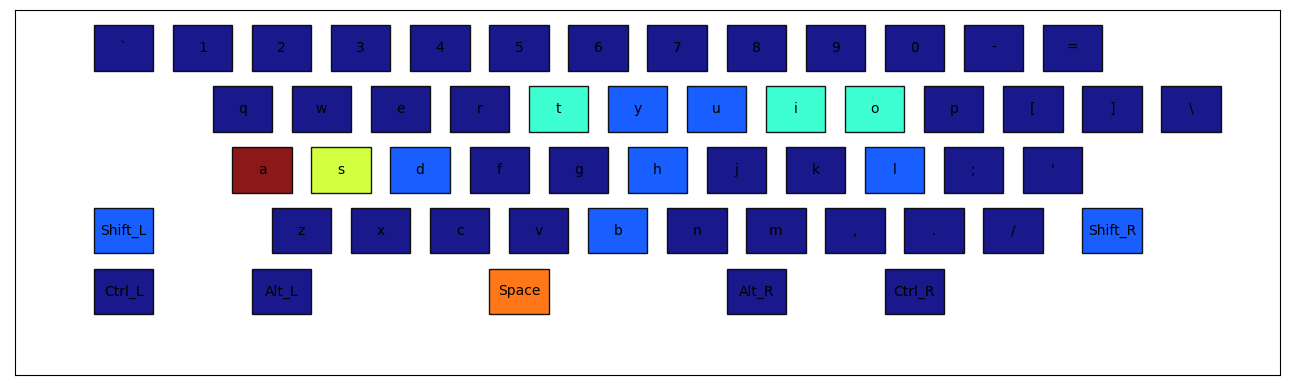

In [11]:
if __name__ == "__main__":
    layout = qwerty
    get = kdb_analysis(layout)  # creating a class object
    s = "This Layout is so baaaad"
    get.travel_dist(s)

In [ ]:
p = input("Enter a string: ")
get.travel_dist(p)